In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\SURAJ\Downloads\diabetes_prediction_dataset.csv")
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
for i in df.columns:
    print(i,'\n',df[i].unique())
    print('='*50)

gender 
 ['Female' 'Male' 'Other']
age 
 [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension 
 [0 1]
heart_disease 
 [1 0]
smoking_history 
 ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi 
 [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level 
 [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level 
 [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280

In [6]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [7]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

# Visualizations

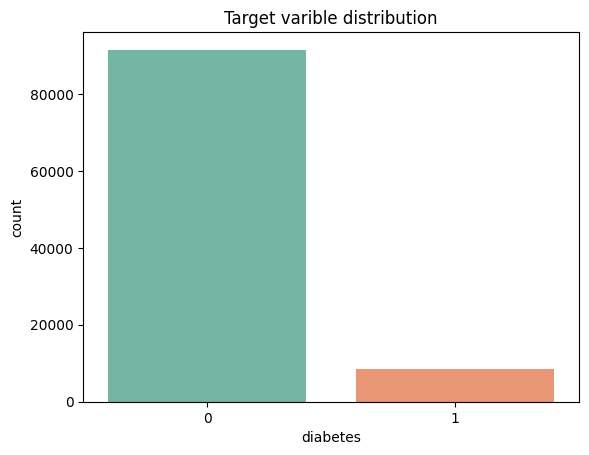

In [8]:
sns.countplot(x=df.diabetes,palette='Set2')
plt.title('Target varible distribution')
plt.show()

# Class imbalance is present:- More non-diabetic (0) than diabetic(1)

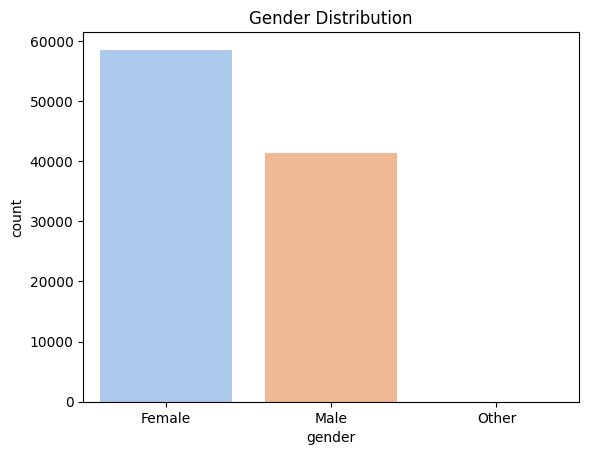

In [9]:
sns.countplot(x=df.gender,palette='pastel')
plt.title('Gender Distribution')
plt.show()

# balanced male and female in data but very few labeled as other

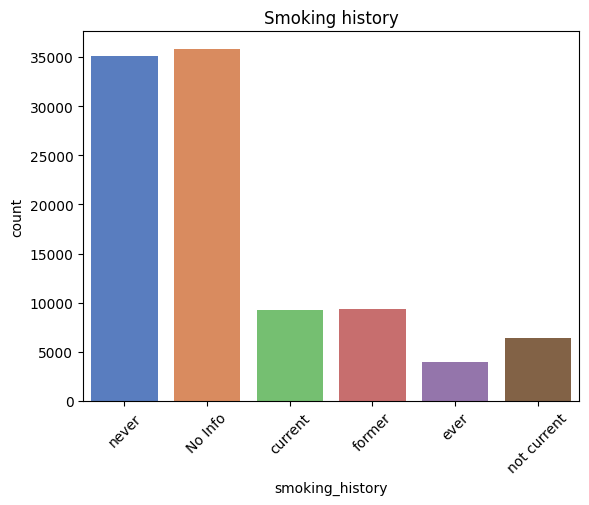

In [10]:
sns.countplot(x=df.smoking_history,palette='muted')
plt.title('Smoking history')
plt.xticks(rotation=45)
plt.show()

# many entris are 'No info' and 'never' followed by 'current' and 'former' smokers

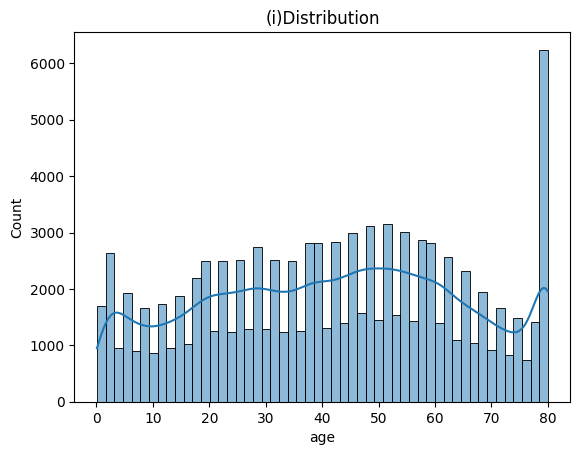

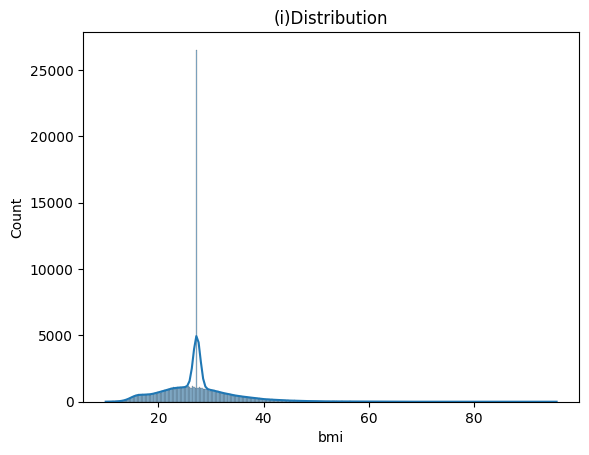

In [11]:
for i in ['age','bmi']:
    sns.histplot(df[i],kde=True)
    plt.title(f'(i)Distribution')
    plt.show()

# Mostly middle aged and elderly people(peaks around 40-70 years)
# Normal distribution common BMI range is between 20-35

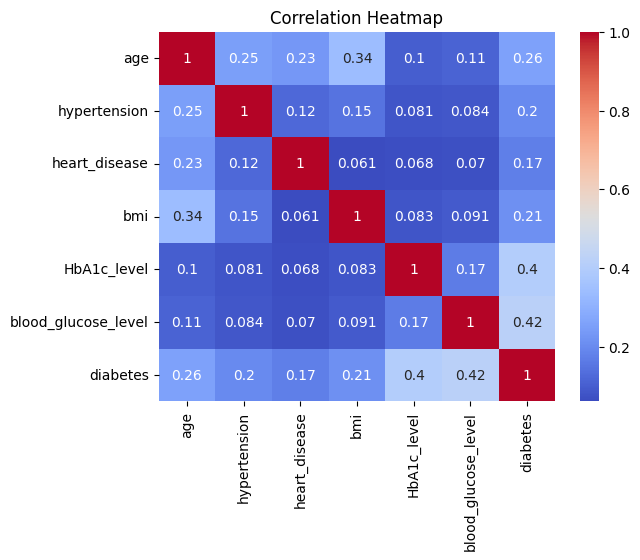

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 'HbA1c_level, and 'Blood_glucose_level, show possitive correlation with 'daibetes' makes sense medically.
# ======================================

# Encode Categprical variables

In [13]:
df.gender=df.gender.map({'Female':0,'Male':1,'Other':2})

In [14]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [15]:
le=LabelEncoder()
df.smoking_history=le.fit_transform(df.smoking_history)

In [16]:
df.smoking_history.unique()

array([4, 0, 1, 3, 2, 5])

In [17]:
# feature and target

In [18]:
x=df.drop('diabetes',axis=1)
y=df.diabetes

In [19]:
# scaling
sc=StandardScaler()
x_scaled=sc.fit_transform(x)


In [20]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# model training

In [21]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Accuracy',accuracy_score(y_test,y_pred))
print('='*50)
print(classification_report(y_test,y_pred))

Accuracy 0.9587
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



<Axes: >

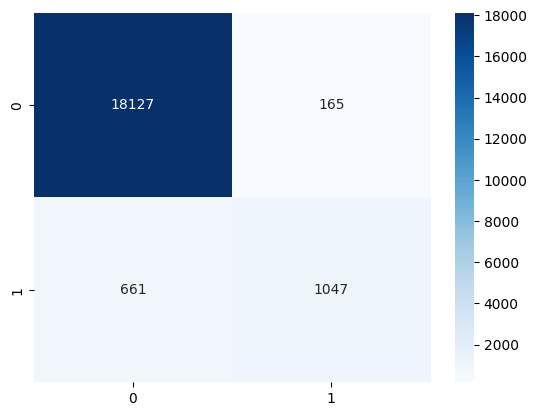

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')